<a href="https://www.kaggle.com/code/lorresprz/trend-of-us-overdose-deaths-2015-2023?scriptVersionId=145311777" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('/kaggle/input/drug-overdose-deaths/VSRR_Provisional_Drug_Overdose_Death_Counts.csv', thousands=',')
df.sample(6)

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
53874,WA,2017,October,12 month-ending,Number of Drug Overdose Deaths,1112.0,100.0,0.056496,Washington,Numbers may differ from published reports usin...,**,1115.0
6630,CO,2019,November,12 month-ending,Cocaine (T40.5),127.0,100.0,0.020028,Colorado,Numbers may differ from published reports usin...,**,128.0
31453,NC,2016,October,12 month-ending,Psychostimulants with abuse potential (T43.6),110.0,100.0,0.249489,North Carolina,Numbers may differ from published reports usin...,**,114.0
43656,RI,2021,December,12 month-ending,Methadone (T40.3),45.0,100.0,0.042981,Rhode Island,Numbers may differ from published reports usin...,**,46.0
19684,KS,2019,May,12 month-ending,Natural & semi-synthetic opioids (T40.2),NaN,100.0,0.003799,Kansas,Numbers may differ from published reports usin...,**,NaN
39336,OH,2017,September,12 month-ending,Number of Deaths,123096.0,100.0,0.027621,Ohio,Numbers may differ from published reports usin...,**,NaN


In [3]:
color = sns.color_palette("viridis", 6)
color

[(0.275191, 0.194905, 0.496005),
 (0.212395, 0.359683, 0.55171),
 (0.153364, 0.497, 0.557724),
 (0.122312, 0.633153, 0.530398),
 (0.288921, 0.758394, 0.428426),
 (0.626579, 0.854645, 0.223353)]

In [4]:
df.isnull().sum()

State                                0
Year                                 0
Month                                0
Period                               0
Indicator                            0
Data Value                       10957
Percent Complete                     0
Percent Pending Investigation        0
State Name                           0
Footnote                          5247
Footnote Symbol                   5400
Predicted Value                  21203
dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.columns

Index(['State', 'Year', 'Month', 'Period', 'Indicator', 'Data Value',
       'Percent Complete', 'Percent Pending Investigation', 'State Name',
       'Footnote', 'Footnote Symbol', 'Predicted Value'],
      dtype='object')

In [7]:
#There are 53 states, including the whole of US and YC (New York City)
df.State.nunique(), df.State.unique()

(53,
 array(['AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'FL', 'GA',
        'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD', 'ME',
        'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
        'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
        'US', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY', 'YC'], dtype=object))

In [8]:
#Join the State and the State name together
df['State'] = df['State']+ '-'+ df['State Name']
df = df.drop(['State Name'], axis = 1)

In [9]:
df.Month.unique()

array(['April', 'August', 'December', 'February', 'January', 'July',
       'June', 'March', 'May', 'November', 'October', 'September'],
      dtype=object)

In [10]:
#Change the months to numeric format
mdict = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5,
        'June': 6, 'July': 7, 'August': 8, 'September': 9, 'October': 10,
        'November': 11, 'December': 12}
df['Month'] = df['Month'].map(mdict)

In [11]:
#Drop the rows corresponding to US in the dataset to analyze it separately
df_us = df[df['State']=='US-United States']
df = df.drop(df[df['State']=='US-United States'].index)


# Explore the year 2023

In [12]:
df23 = df[df['Year']==2023]
df_us_23 = df_us[df_us['Year']==2023]

In [13]:
#Pick the month of Feb to analyze later
df_Feb23_no= df23[(df23['Indicator'] == 'Number of Drug Overdose Deaths') & (df23['Month']==2)]

## California, Florida & the whole of US: Overdose deaths by various drugs in Feb 2023

In [14]:
df23.Indicator.unique()

array(['Methadone (T40.3)', 'Number of Drug Overdose Deaths',
       'Natural & semi-synthetic opioids (T40.2)',
       'Psychostimulants with abuse potential (T43.6)',
       'Opioids (T40.0-T40.4,T40.6)',
       'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)',
       'Cocaine (T40.5)',
       'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
       'Heroin (T40.1)', 'Synthetic opioids, excl. methadone (T40.4)'],
      dtype=object)

The classification of indicators in this dataset involves multiple indicators that are overlapping. 

- The category of  'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)' includes two separate categories:
  - 'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)', and 'Methadone (T40.3)'.
  
  
- Similarly, the category of 'Opioids (T40.0-T40.4,T40.6)' includes everything labeled as 'T40.0' to 'T40.4', in addition to 'T40.6'. 


- A list with non-overlapping categories of drugs is:
  - 'Heroin (T40.1)'
  - 'Natural & semi-synthetic opioids (T40.2)'
  - 'Methadone (T40.3)' 
  - 'Synthetic opioids, excl. methadone (T40.4)'
  - 'Cocaine (T40.5)'
  - 'Psychostimulants with abuse potential (T43.6)' (should this be 'T40.6' instead of 'T43.6' ?)
  
  
- A list with overlapping categories of drugs is:
    - 'Opioids (T40.0-T40.4,T40.6)'
    -  'Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)',
    - 'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)',
        
As such, in the following analysis, we will filter out those columns in the sub-datasets corresponding to the overlapping categories of drugs above in order to get a clear picture of the cause of overdose deaths attributable to each separate category of drugs. Furthermore, one of the indicators is  'Number of Drug Overdose Deaths', which should also be dropped. 

In [15]:
df23 = df23.drop(df23[df23['Indicator']=='Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)'].index)
df23 = df23.drop(df23[df23['Indicator']== 'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)'].index)
df23 = df23.drop(df23[df23['Indicator']== 'Opioids (T40.0-T40.4,T40.6)'].index)
df23 = df23.drop(df23[df23['Indicator']== 'Number of Drug Overdose Deaths'].index)

df_us_23 = df_us_23.drop(df_us_23[df_us_23['Indicator']=='Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)'].index)
df_us_23 = df_us_23.drop(df_us_23[df_us_23['Indicator']== 'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)'].index)
df_us_23 = df_us_23.drop(df_us_23[df_us_23['Indicator']== 'Opioids (T40.0-T40.4,T40.6)'].index)
df_us_23 = df_us_23.drop(df_us_23[df_us_23['Indicator']== 'Number of Drug Overdose Deaths'].index)

Text(0.5, 1.0, 'US overdose deaths by drugs in Feb 2023')

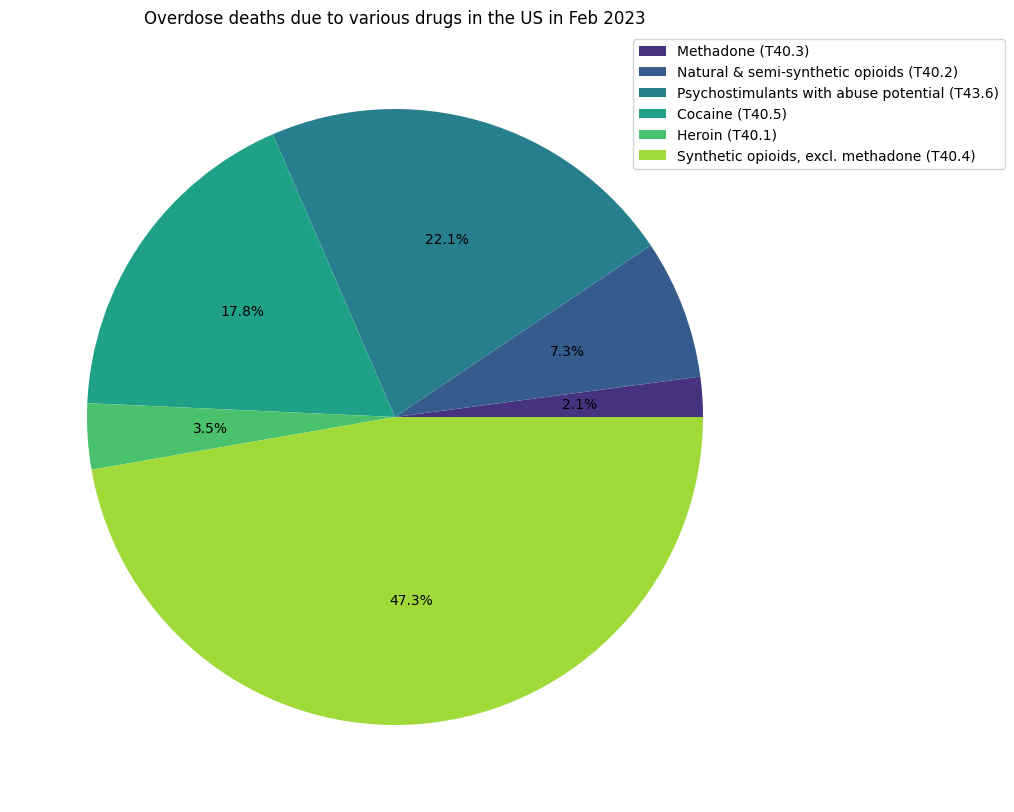

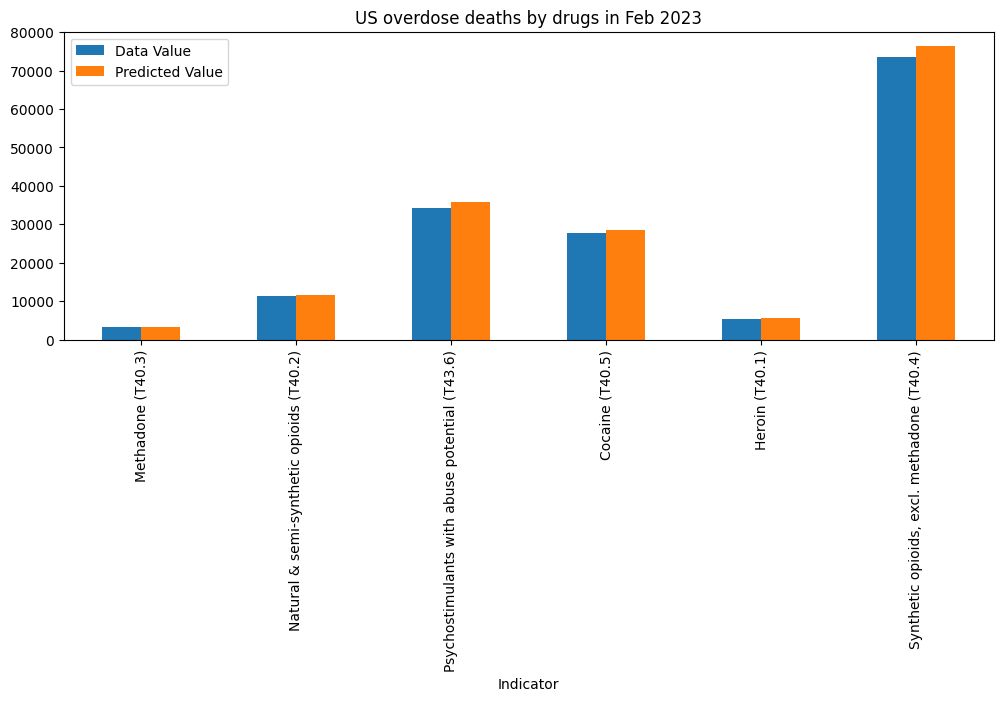

In [16]:
#Focus only on February and set index to 'Indicator'
df_us_23_Feb = df_us_23[df_us_23['Month']== 2]
df_us_23_Feb = df_us_23_Feb.set_index('Indicator')


#Plot the share of actual overdose deaths due to various drugs in the month of Feb
data = df_us_23_Feb['Data Value']
ax =data.plot.pie(title = 'Overdose deaths due to various drugs in the US in Feb 2023',
                  figsize = (10,10), autopct="%.1f%%", ylabel='', labeldistance=None, colors = color)
ax.legend(bbox_to_anchor=(0.8, 1.0), loc='upper left')

#Plot the actual and predicted overdose deaths for all indicators in the month of Feb
df_us_23_Feb[['Data Value', 'Predicted Value']].plot(kind="bar", figsize = (12,4))
#plt.setp(plot.get_xticklabels(), rotation=60)
plt.title("US overdose deaths by drugs in Feb 2023")

Text(0.5, 1.0, 'US overdose deaths by drugs in California in Feb 2023')

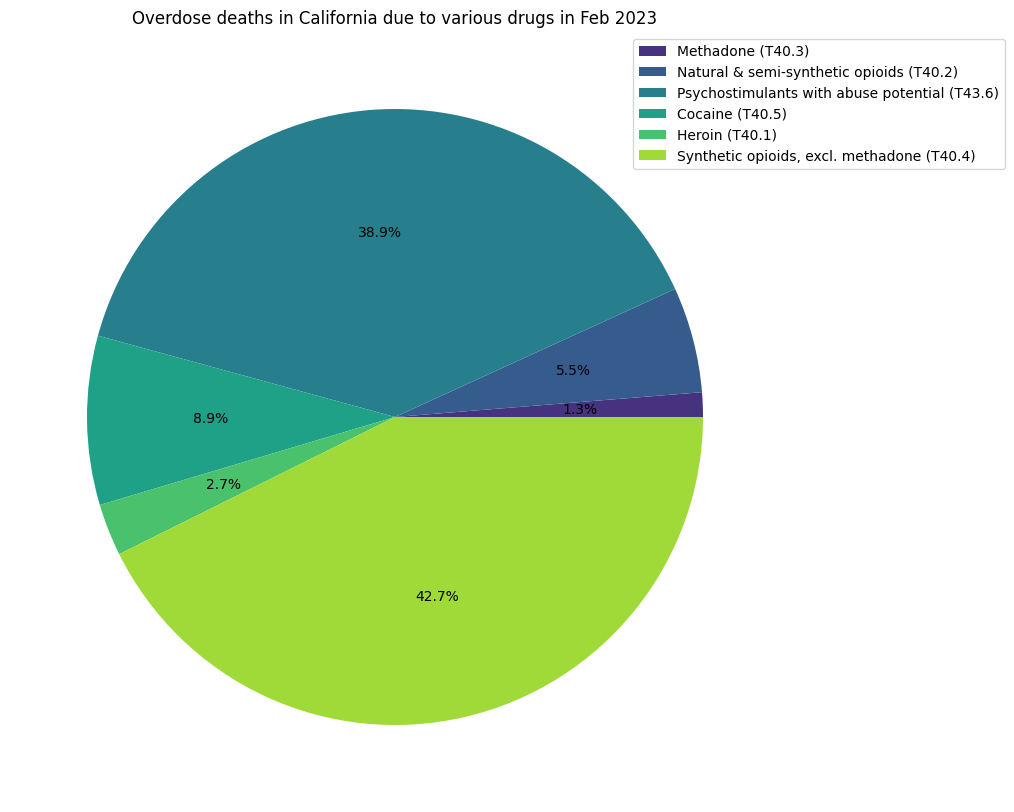

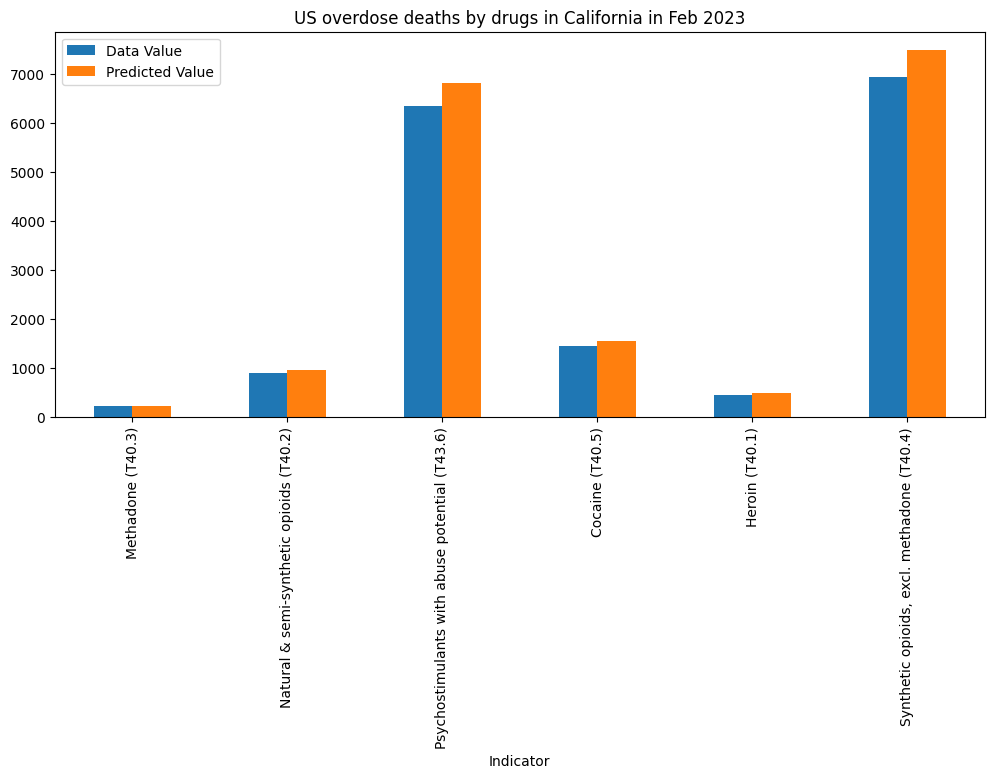

In [17]:
df23_CA = df23[df23['State'] == 'CA-California']

#Focus only on February and set index to 'Indicator'
df23_CA_Feb = df23_CA[df23_CA['Month']==2]
df23_CA_Feb = df23_CA_Feb.set_index('Indicator')

#Plot the share of actual overdose deaths due to various drugs in the month of Feb
data = df23_CA_Feb['Data Value']
ax =data.plot.pie(title = 'Overdose deaths in California due to various drugs in Feb 2023', 
                  figsize = (10,10), autopct="%.1f%%", ylabel = '', labeldistance = None, colors = color)
ax.legend(bbox_to_anchor=(0.8, 1.0), loc='upper left')

#Plot the actual and predicted overdose deaths for all indicator in the month of Feb
df23_CA_Feb[['Data Value', 'Predicted Value']].plot(kind="bar", figsize = (12,5))
#plt.setp(plot.get_xticklabels(), rotation=60)
plt.title("US overdose deaths by drugs in California in Feb 2023")

Text(0.5, 1.0, 'US overdose deaths by drugs in Florida in Feb 2023')

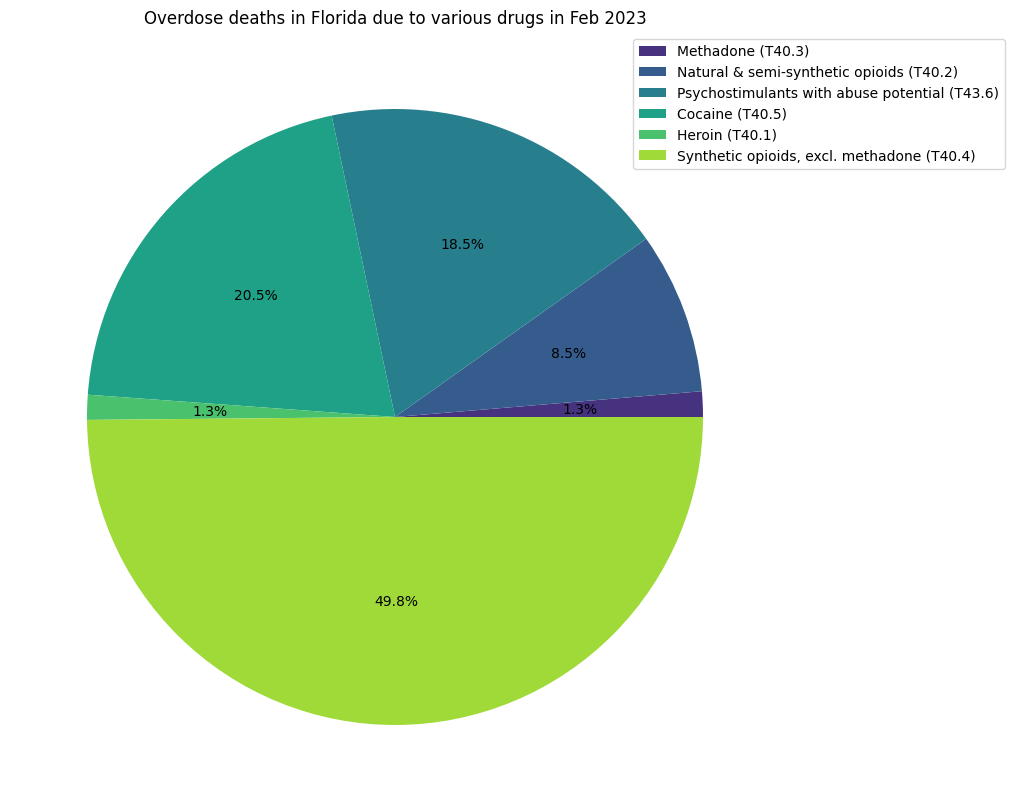

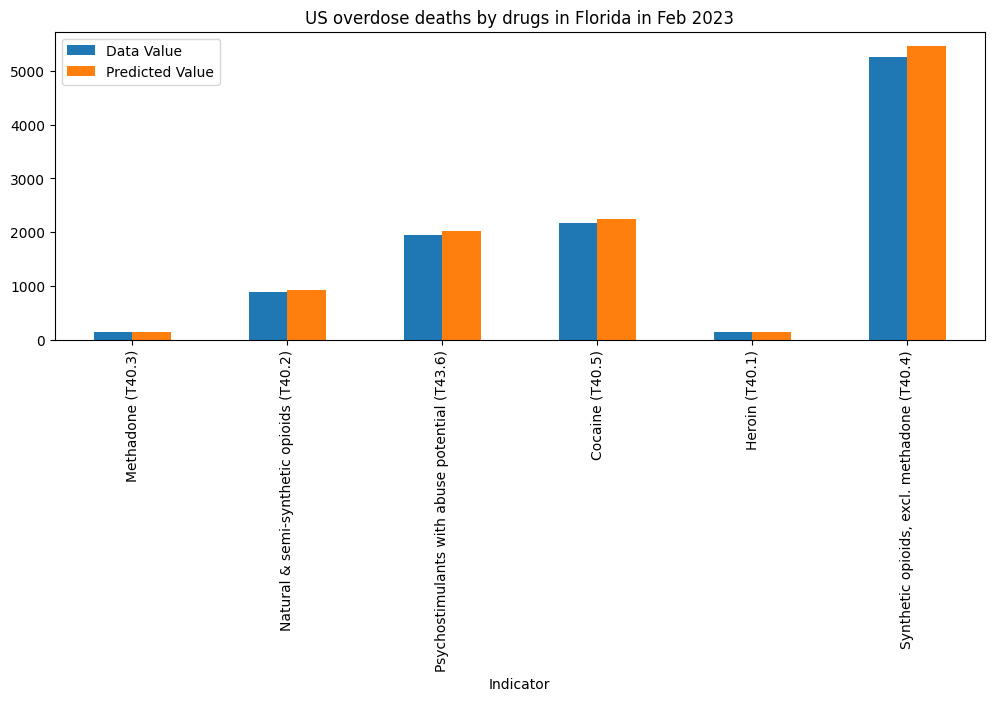

In [18]:
df23_FL = df23[df23['State'] == 'FL-Florida']

#Focus only on February and set index to 'Indicator'
df23_FL_Feb = df23_FL[df23_FL['Month']==2]
df23_FL_Feb = df23_FL_Feb.set_index('Indicator')

#Plot the share of actual overdose deaths due to various drugs in the month of Feb
data = df23_FL_Feb['Data Value']
ax =data.plot.pie(title = 'Overdose deaths in Florida due to various drugs in Feb 2023',
                         figsize = (10,10), autopct="%.1f%%", ylabel ='', labeldistance =None, colors = color)
ax.legend(bbox_to_anchor=(0.8, 1.0), loc='upper left')

#Plot the actual and predicted overdose deaths for all indicator in the month of Feb
df23_FL_Feb[['Data Value', 'Predicted Value']].plot(kind="bar", figsize = (12,4))
#plt.setp(plot.get_xticklabels(), rotation=60)
plt.title("US overdose deaths by drugs in Florida in Feb 2023")

The trend of overdose deaths in CA, FL and the whole of US in the month of Feb 2023 follows a clear pattern: deaths by synthetic opioids account for the largest percentage of the total deaths. A comprehensive list of synthetic opioids (which includes fentanyl) can be found at https://en.wikipedia.org/wiki/Category:Synthetic_opioids

Psychostimulants with abuse potential that include drugs such as methamphetamine account for the second largest portion of total overdose deaths. Cocaine is also responsible for a large portion of deaths, comparable to the one accounted by psychostimulants. 

On the other hand, deaths by semi-synthetic opioids in Feb 2023 and heroin occurred much less that those caused by the synthetic opioids or psychostimulants or cocaine.

##  Deaths by synthetic opioids overdose in all states in February 2023

In [19]:
df_Feb23_syn_opioids = df23[(df23['Indicator'] == 'Synthetic opioids, excl. methadone (T40.4)') & (df23['Month']==2)]

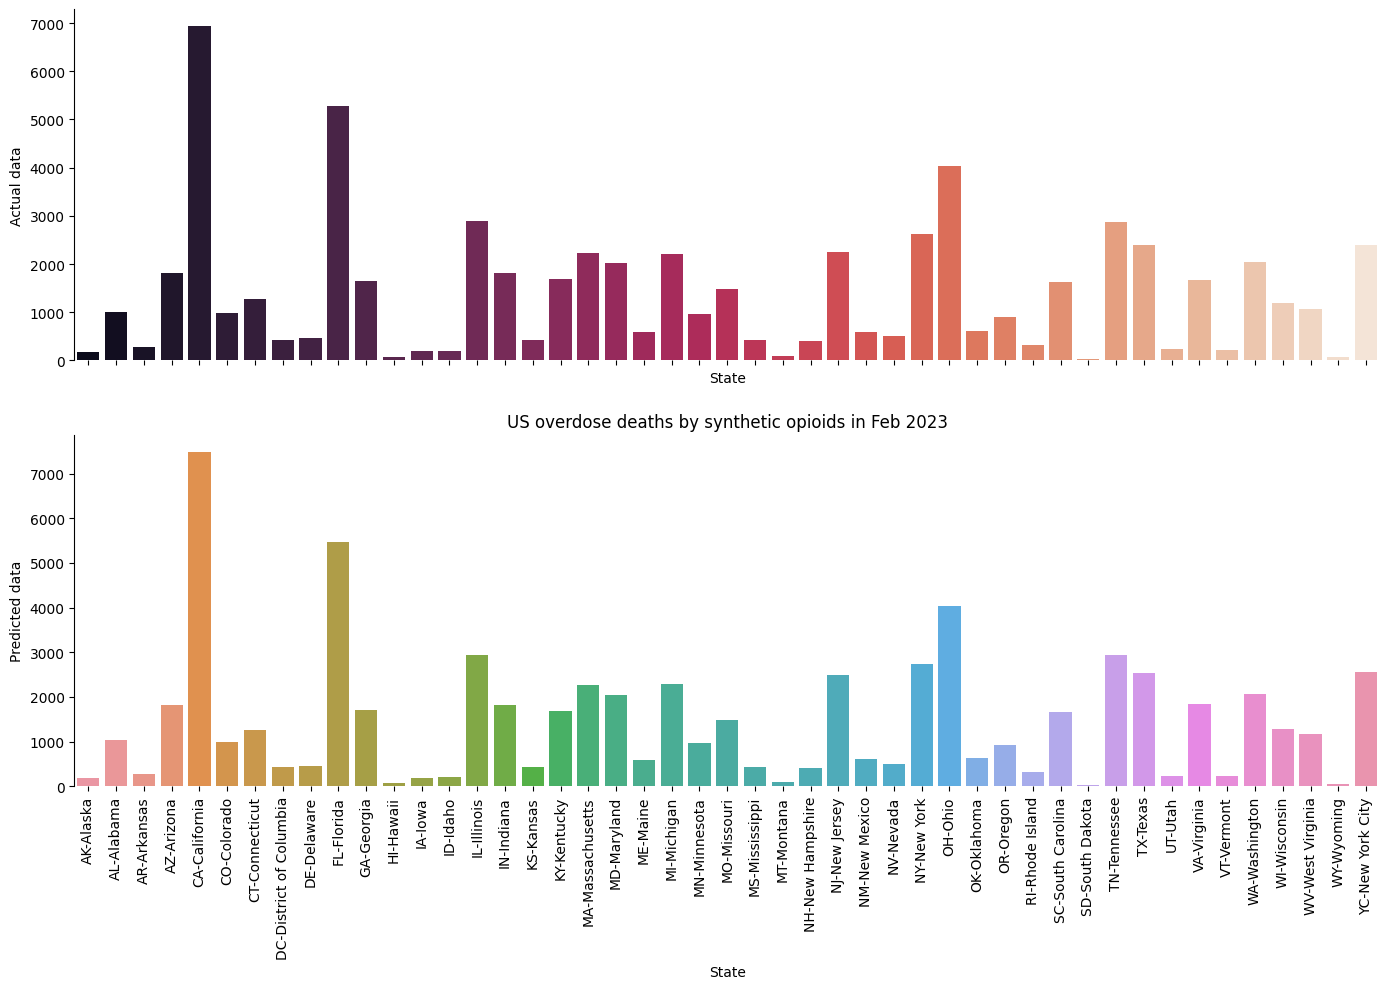

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), sharex=True)
plt.title('US overdose deaths by synthetic opioids in Feb 2023')
x=df_Feb23_syn_opioids['State']
y1=df_Feb23_syn_opioids['Data Value']
sns.barplot(x=x, y=y1, palette="rocket", ax=ax1)
ax1.set_ylabel("Actual data")

y2 = df_Feb23_syn_opioids['Predicted Value']
plot = sns.barplot(x=x, y=y2,  ax=ax2)
ax2.set_ylabel("Predicted data")
plt.setp(plot.get_xticklabels(), rotation=90)
sns.despine(bottom=True)
#plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

The data for Feb 2023 shows that California has the highest number of overdose deaths due to synthetic opioids in all states, followed by Florida. The state with the least number of deaths due to synthetic opioids seems to be South Dakota.

# Back in time: Year 2019

For a comparison, we repeat the above analysis here for the year 2019.

In [21]:
df19 = df[df['Year']==2019]
df_us_19 = df_us[df_us['Year']==2019]

## Distribution of overdose deaths in the whole of the US due to various drugs in Feb 2019

In [22]:
df_us_Feb19 = df_us_19[(df_us_19['Month']==2) ]

In [23]:
df_us_Feb19 = df_us_Feb19.drop(df_us_Feb19[df_us_Feb19['Indicator']=='Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)'].index)
df_us_Feb19 = df_us_Feb19.drop(df_us_Feb19[df_us_Feb19['Indicator']== 'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)'].index)
df_us_Feb19 = df_us_Feb19.drop(df_us_Feb19[df_us_Feb19['Indicator']== 'Opioids (T40.0-T40.4,T40.6)'].index)
df_us_Feb19 = df_us_Feb19.drop(df_us_Feb19[df_us_Feb19['Indicator']== 'Number of Drug Overdose Deaths'].index)

Text(0.5, 1.0, 'US overdose deaths by drugs in the whole of US in Feb 2019')

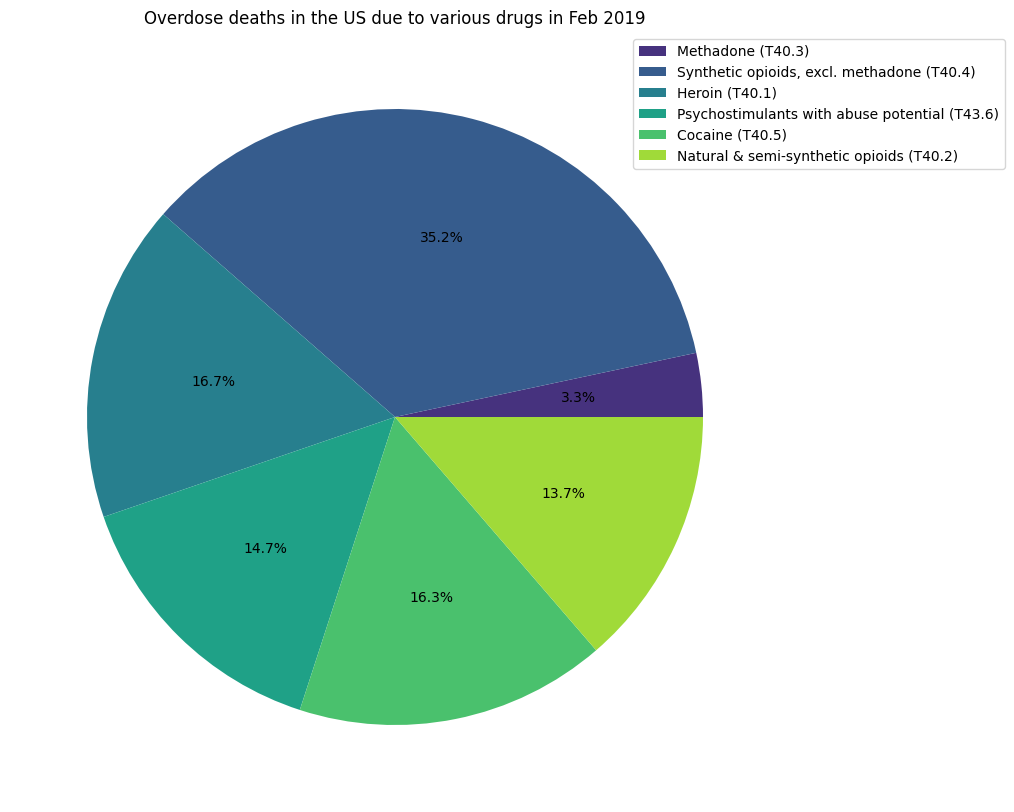

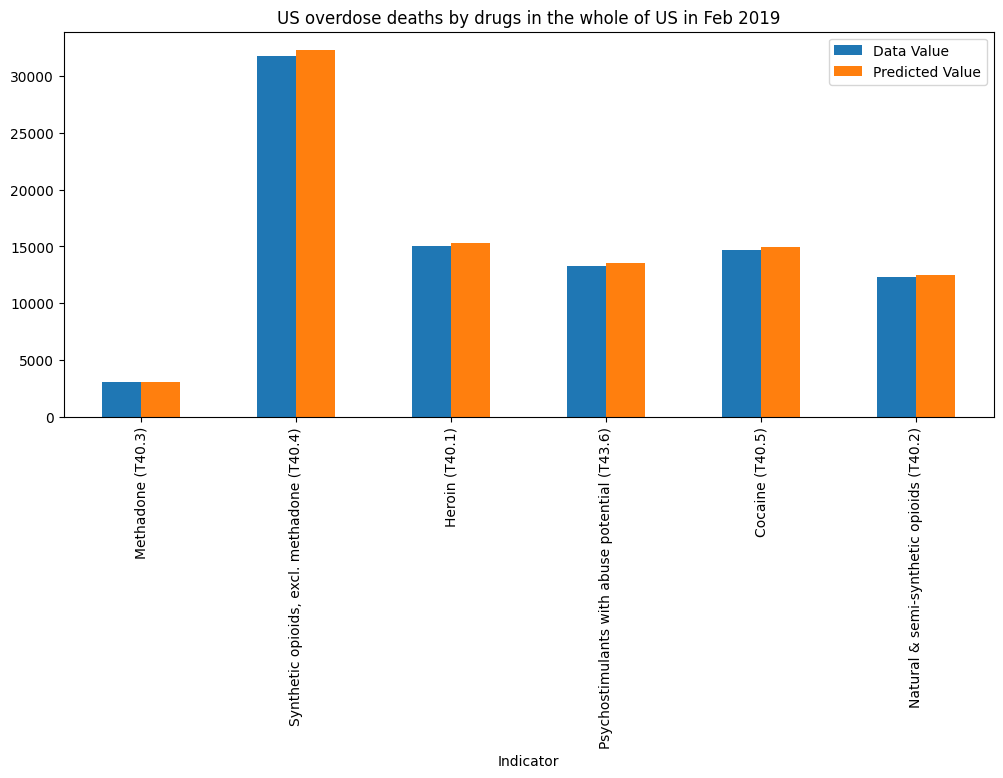

In [24]:
df_us_Feb19  = df_us_Feb19.set_index('Indicator')

data = df_us_Feb19 ['Data Value']
ax =data.plot.pie(title = 'Overdose deaths in the US due to various drugs in Feb 2019',
                         figsize = (10,10), autopct="%.1f%%", ylabel ='', labeldistance =None, colors = color)
ax.legend(bbox_to_anchor=(0.8, 1.0), loc='upper left')

#Plot the actual and predicted overdose deaths for all indicator in the month of Feb
df_us_Feb19[['Data Value', 'Predicted Value']].plot(kind="bar", figsize = (12,5))
#plt.setp(plot.get_xticklabels(), rotation=60)
plt.title("US overdose deaths by drugs in the whole of US in Feb 2019")

In Feb 2019, overdose by synthetic opioids still dominate in the cause of deaths, followed by heroin and cocaine. Psychostimulants with potential for abuse is the fourth cause of overdose deaths. 

# Further back in time: Year 2016

In [25]:
df16 = df[df['Year']==2016]
df_us_16 = df_us[df_us['Year']==2016]

## Distributions of overdose deaths due to different drugs in the whole of US

We repeat the above analysis for 2023 and for 2019 above for the year 2016 for a comparison.

In [26]:
df_us_Feb16 = df_us_16[(df_us_16['Month']==2) ]

In [27]:
df_us_Feb16 = df_us_Feb16.drop(df_us_Feb16[df_us_Feb16['Indicator']=='Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)'].index)
df_us_Feb16 = df_us_Feb16.drop(df_us_Feb16[df_us_Feb16['Indicator']== 'Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)'].index)
df_us_Feb16 = df_us_Feb16.drop(df_us_Feb16[df_us_Feb16['Indicator']== 'Opioids (T40.0-T40.4,T40.6)'].index)
df_us_Feb16 = df_us_Feb16.drop(df_us_Feb16[df_us_Feb16['Indicator']== 'Number of Drug Overdose Deaths'].index)

Text(0.5, 1.0, 'US overdose deaths by drugs in the whole of US in Feb 2016')

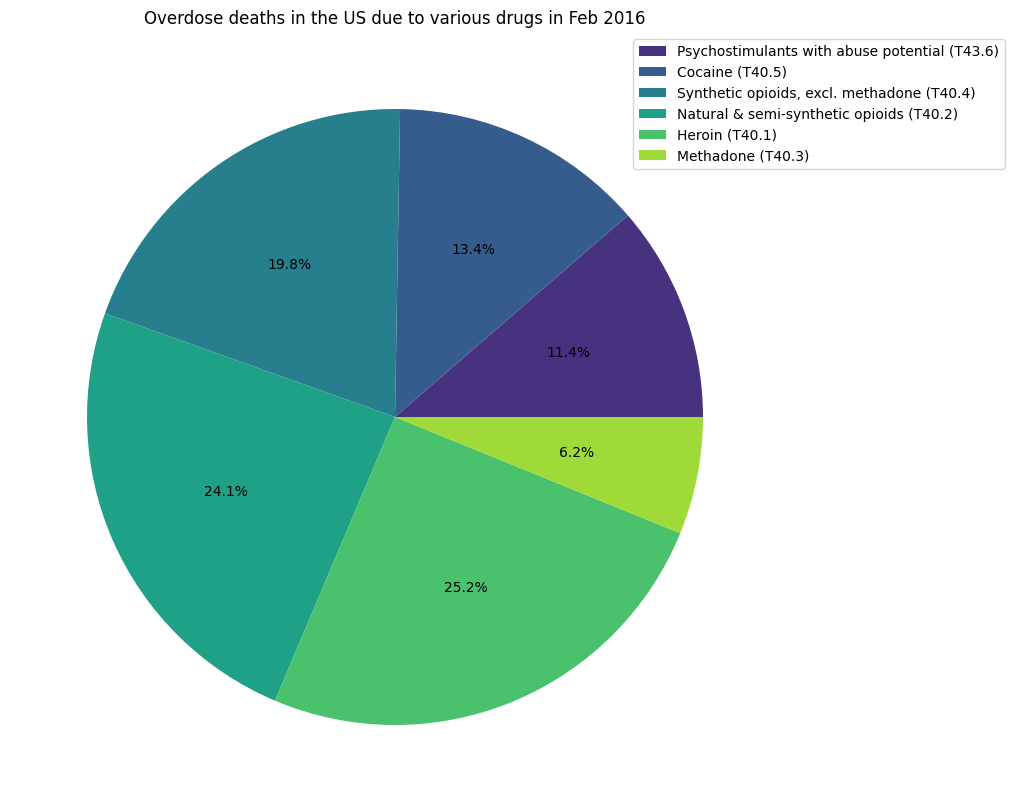

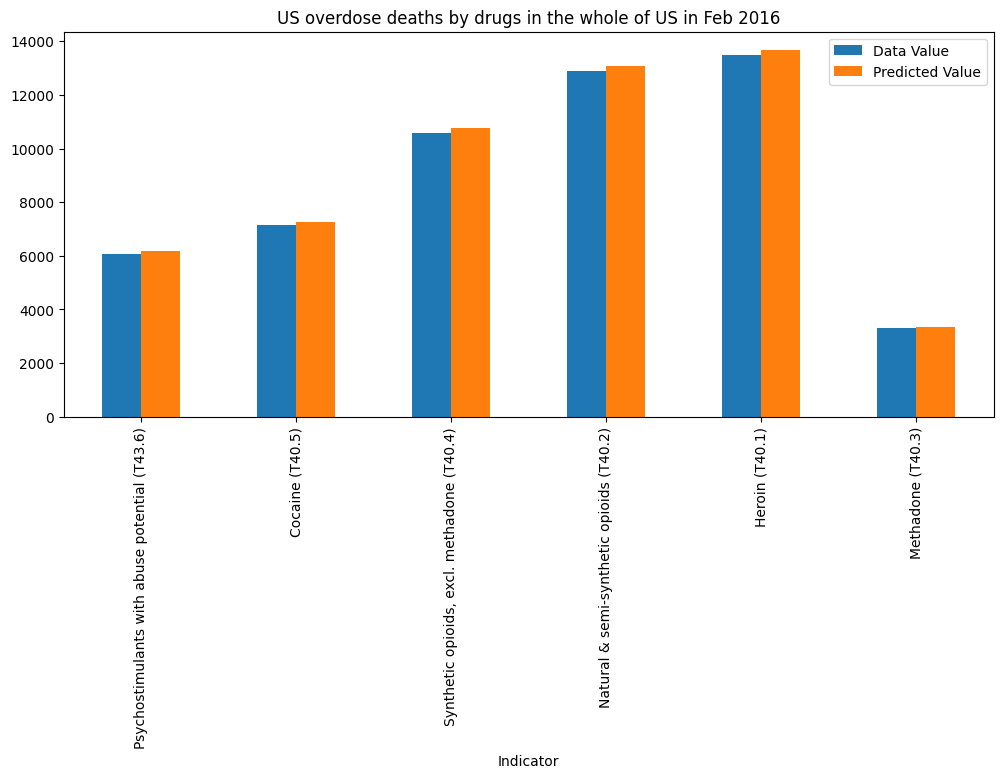

In [28]:
df_us_Feb16  = df_us_Feb16.set_index('Indicator')

data = df_us_Feb16 ['Data Value']
ax =data.plot.pie(title = 'Overdose deaths in the US due to various drugs in Feb 2016',
                         figsize = (10,10), autopct="%.1f%%", ylabel ='', labeldistance =None, colors = color)
ax.legend(bbox_to_anchor=(0.8, 1.0), loc='upper left')

#Plot the actual and predicted overdose deaths for all indicator in the month of Feb
df_us_Feb16[['Data Value', 'Predicted Value']].plot(kind="bar", figsize = (12,5))
#plt.setp(plot.get_xticklabels(), rotation=60)
plt.title("US overdose deaths by drugs in the whole of US in Feb 2016")

In 2016, deaths by natural or semi-synthetic opioids and by heroin dominate the chart. Deaths by synthetic opioids occured less compared to those by semi-synthetic opioids and heroin, which is the opposite of the trend in 2019 and in 2023. This makes sense because synthetic opioids started to become prevalent only recently (towards the early 2020s). 

# Total overdose deaths between 2016, 2019 and 2023 in all states

In this section, we look at the indicator 'Number of Drug Overdose Deaths' for all states (including YC - New York City) for the month of Feb for 3 years: 2016, 2019 and 2023.

In [29]:
df_Feb16_no = df16[(df16['Indicator'] == 'Number of Drug Overdose Deaths') & (df16['Month']==2)]
df_Feb19_no = df19[(df19['Indicator'] == 'Number of Drug Overdose Deaths') & (df19['Month']==2)]

In [30]:
df_Feb23_no = df_Feb23_no.set_index('State')
df_Feb19_no = df_Feb19_no.set_index('State')
df_Feb16_no = df_Feb16_no.set_index('State')

In [31]:
df_Feb16_no['Data Value 2023'] = df_Feb23_no['Data Value']
df_Feb16_no['Data Value 2019'] = df_Feb19_no['Data Value']
df_Feb16_no['Data Value 2016'] = df_Feb16_no['Data Value']

<Axes: title={'center': 'Number of drug overdose deaths in the US'}, xlabel='State'>

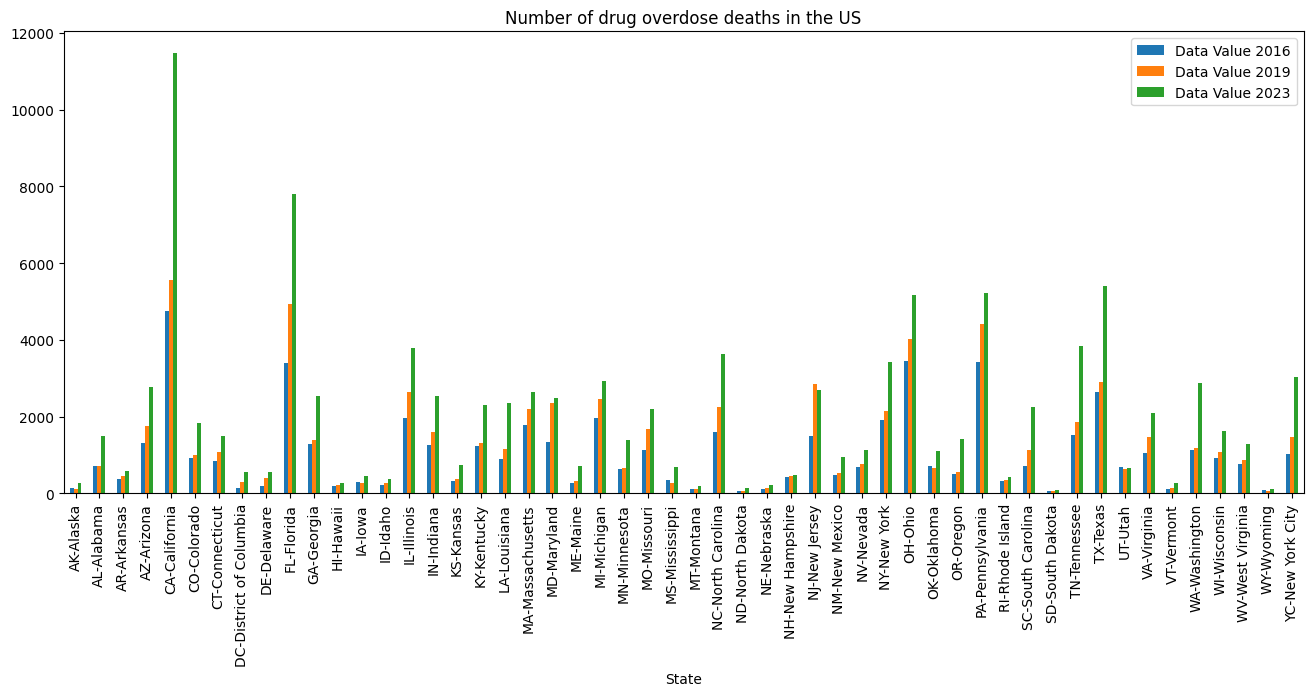

In [32]:
fig, ax1 = plt.subplots(figsize = (16,6))
df_Feb16_no[['Data Value 2016','Data Value 2019', 'Data Value 2023']].plot(kind = 'bar', ax = ax1, title = 'Number of drug overdose deaths in the US')

The trend is clear: There is a large increase in overdose deaths in all states going from Feb 2016 to Feb 2019 and finally to Feb 2023. Furthermore, the increase going from 2019 to 2023 seems larger than the increase going from 2016 to 2019 in the majority of large states. Overall, the number of total overdose deaths in Feb 2023 far exceeds the number of deaths in Feb 2016 in all states. 

# Total number of overdose deaths in the US over the years: 2015 - 2023

In this section, we look at the sub-dataset for the whole of the US ('State' = 'US'). In particular, we choose the month of March for each year from 2015 to 2023 to plot the total number of overdose deaths. 

In [33]:
df_us_no = df_us[(df_us['Indicator']=='Number of Drug Overdose Deaths') & (df_us['Month']==3)]

In [34]:
df_us_no = df_us_no.set_index('Year')

<Axes: title={'center': 'Total deaths in the US due to drug overdose from 2015 - 2023'}, xlabel='Year'>

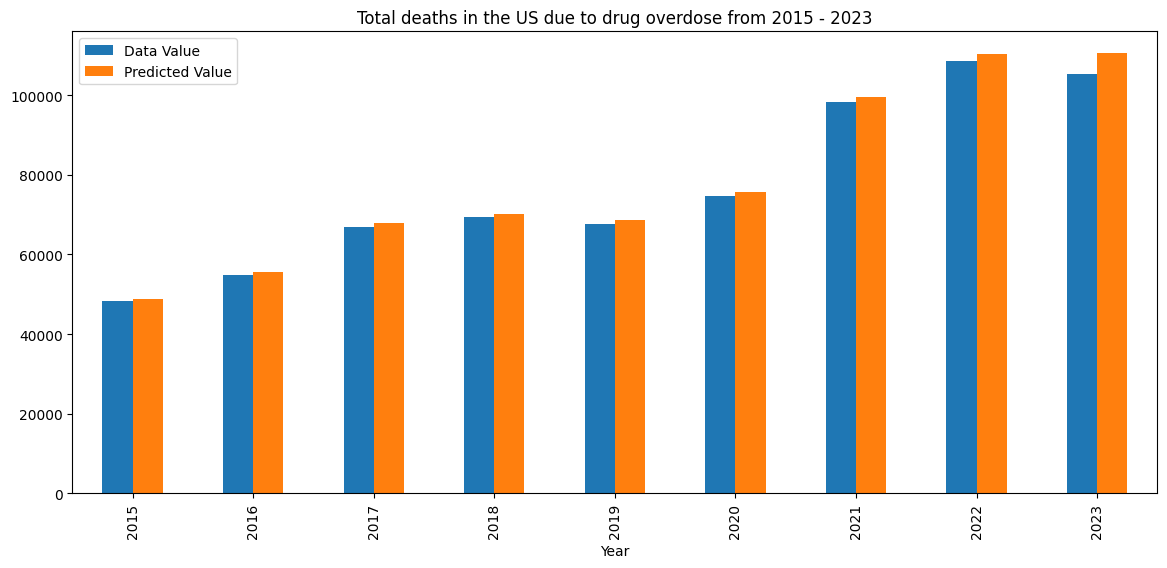

In [35]:
df_us_no[['Data Value', 'Predicted Value']].plot(kind = 'bar', figsize = (14,6), title = 'Total deaths in the US due to drug overdose from 2015 - 2023')

There is a clear upward trend of the total number of overdose deaths in the US from 2015 to 2023, although there seems to be a decrease of actual value going from 2022 to 2023.

# Conclusions

According to this dataset, the number of overdose deaths in the US shows a clear upward trend going from 2015 to 2023 as shown in various graphs in this notebook. 

The underlying cause of these overdose deaths follows a pattern: 

 - In the late 2010s, specifically in the year 2016, overdose deaths due to heroin and natural/semi-synthetic opioids account for the largest portion of the total number of deaths. 
 - In the early 2020s (2019 - present year 2023), overdose deaths due to synthetic opioids and psychostimulants with potential for abuse overtook those occurring due to heroin and natural/semi-synthetic opioids 
 - In recent years, due to the prevalence of synthetic opioids (such as fentanyl and fentanyl analogs) and psychostimulants (such as methamphetamine), overdose deaths involving these substances have increased rapidly.
  
Furthermore, larger states such as California, Texas, Florida (and also big cities such as New York) account for a large number of overdose deaths, as expected.